In [2]:
!pip install patool
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


## Imports

In [3]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import patoolib
import pytesseract
import warnings
warnings.filterwarnings("ignore")

## Downloads

In [4]:
patoolib.extract_archive(r'/content/drive/MyDrive/Data Science Projects/Model Weights.zip', outdir="/content")

patool: Extracting /content/drive/MyDrive/Data Science Projects/Model Weights.zip ...
patool: running /usr/bin/7z x -o/content -- "/content/drive/MyDrive/Data Science Projects/Model Weights.zip"
patool: ... /content/drive/MyDrive/Data Science Projects/Model Weights.zip extracted to `/content'.


'/content'

## Model Selection

In [5]:
model_weight_path = r"/content/Model Weights"

In [6]:
model = load_model(os.path.join(model_weight_path, "MobileNetV3Large.h5"))

### Plate Number Recognition

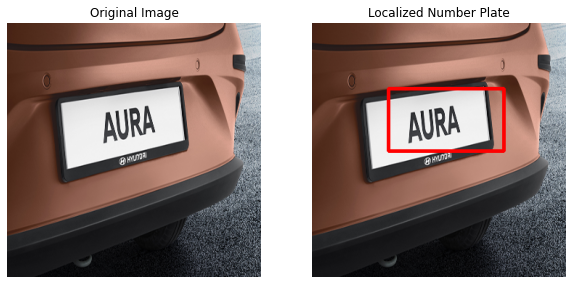



Text in Image ---> AURA



In [7]:
img = cv2.imread("/content/Test_1.jpg")
img = cv2.resize(img, (350, 350))
ans = model.predict(np.reshape(img, (-1, 350, 350, 3)))
coors = ans[0].astype(np.int32)

fig = plt.figure(figsize=(10, 10))
rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
img_cpy = cv2.rectangle(img.copy(), (coors[0], coors[1]), (coors[2], coors[3]), (255, 0, 0), 3)
plt.imshow(img_cpy)
plt.axis('off')
plt.title("Localized Number Plate")
plt.show()

## Region of Interest (ROI) is given some extra padding
roi = img[coors[1] : coors[3], coors[0] : coors[2] - 30]
print("\n\nText in Image ---> {}".format(pytesseract.image_to_string(roi)))

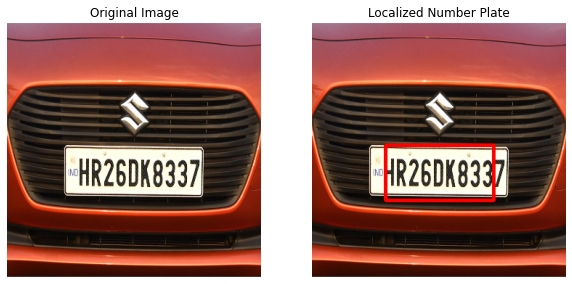



Text in Image ---> ‘HR26DK8337



In [8]:
img = cv2.imread("/content/Test_2.jpg")
img = cv2.resize(img, (350, 350))
ans = model.predict(np.reshape(img, (-1, 350, 350, 3)))
coors = ans[0].astype(np.int32)

fig = plt.figure(figsize=(10, 10))
rows, columns = 1, 2

fig.add_subplot(rows, columns, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")

fig.add_subplot(rows, columns, 2)
img_cpy = cv2.rectangle(img.copy(), (coors[0], coors[1]), (coors[2], coors[3]), (255, 0, 0), 3)
plt.imshow(img_cpy)
plt.axis('off')
plt.title("Localized Number Plate")
plt.show()

## Region of Interest (ROI) is given some extra padding
roi = img[coors[1] + 10 : coors[3] + 30, coors[0] - 20 : coors[2] + 30]
print("\n\nText in Image ---> {}".format(pytesseract.image_to_string(roi)))